Display Help

In [47]:
from mofgbmlpy.fuzzy.knowledge.factory.homo_triangle_knowledge_factory_5 import HomoTriangleKnowledgeFactory_5
from mofgbmlpy.main.moead.mofgbml_moead_main import MoFGBMLMOEADMain
from mofgbmlpy.fuzzy.knowledge.factory.homo_triangle_knowledge_factory_2_3_4_5 import HomoTriangleKnowledgeFactory_2_3_4_5
from mofgbmlpy.main.nsgaii.mofgbml_nsgaii_main import MoFGBMLNSGAIIMain

# runner = MoFGBMLNSGAIIMain(HomoTriangleKnowledgeFactory_2_3_4_5)
# results = runner.main(["--help"])

In [48]:
%matplotlib inline

Run MoFGBMLPy

In [49]:
args = [
    "--algorithm-id", "1",
    "--experiment-id", "2",
    "--data-name", "pima",
    "--train-file", "../dataset/pima/a0_0_pima-10tra.dat",
    "--test-file", "../dataset/pima/a0_0_pima-10tst.dat",
    "--terminate-evaluation", "10000",
    "--objectives", "total-rule-length", "error-rate",
    # "--crossover-type", "pittsburgh-crossover",
    # "--antecedent-factory", "all-combination-antecedent-factory",
    "--no-output-files",
    "--verbose",
]
runner = MoFGBMLNSGAIIMain(HomoTriangleKnowledgeFactory_5)
results = runner.main(args)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       60 |      5 |             - |             -
     2 |      120 |      5 |  0.2200000000 |         ideal
     3 |      180 |      5 |  0.0384615385 |         ideal
     4 |      240 |      9 |  0.0303030303 |         ideal
     5 |      300 |      9 |  0.0294117647 |         ideal
     6 |      360 |      9 |  0.0350877193 |         ideal


KeyboardInterrupt: 

In [25]:
min_length = results.opt.get("X")[0, 0].get_var(0).get_rule().get_length()
max_length = min_length
for sol in results.opt.get("X")[:, 0]:
    for var in sol.get_vars():
        length = var.get_rule().get_length()
        if length < min_length:
            min_length = length
        elif length > max_length:
            max_length = length
print(min_length, max_length) 

0 6


Visualization

In [7]:
i = 1
for var in results.opt.get("X")[0, 0].get_vars():
    print(f"{i}:\t{var.get_rule().get_linguistic_representation()}")
    i += 1

1:	IF	     x1 IS high_5 AND x2 IS very_low_5 AND x4 IS very_low_5 AND x7 IS low_5 THEN Class is  1 with RW: 0.6895 RW: 0.6895
2:	IF	     x1 IS very_low_5 AND x3 IS low_5 AND x5 IS medium_5 AND x6 IS very_low_5 THEN Class is  0 with RW: 0.6232 RW: 0.6232
3:	IF	     x2 IS medium_5 AND x4 IS very_low_5 AND x6 IS high_5 AND x7 IS medium_5 THEN Class is  0 with RW: 0.7940 RW: 0.7940
4:	IF	     x0 IS very_high_5 AND x2 IS high_5 AND x5 IS high_5 AND x6 IS very_low_5 THEN Class is  1 with RW: 0.8675 RW: 0.8675
5:	IF	   x1 IS medium_5 AND x6 IS low_5 THEN Class is  0 with RW: 0.5680 RW: 0.5680
6:	IF	       x0 IS very_low_5 AND x1 IS low_5 AND x2 IS medium_5 AND x3 IS low_5 AND x6 IS medium_5 AND x7 IS very_low_5 THEN Class is  0 with RW: 0.9206 RW: 0.9206
7:	IF	      x0 IS very_low_5 AND x1 IS medium_5 AND x3 IS low_5 AND x5 IS very_low_5 AND x6 IS low_5 THEN Class is  0 with RW: 1.0000 RW: 1.0000
8:	IF	  x1 IS very_high_5 THEN Class is  1 with RW: 0.6791 RW: 0.6791
9:	IF	      x0 IS medium_5 

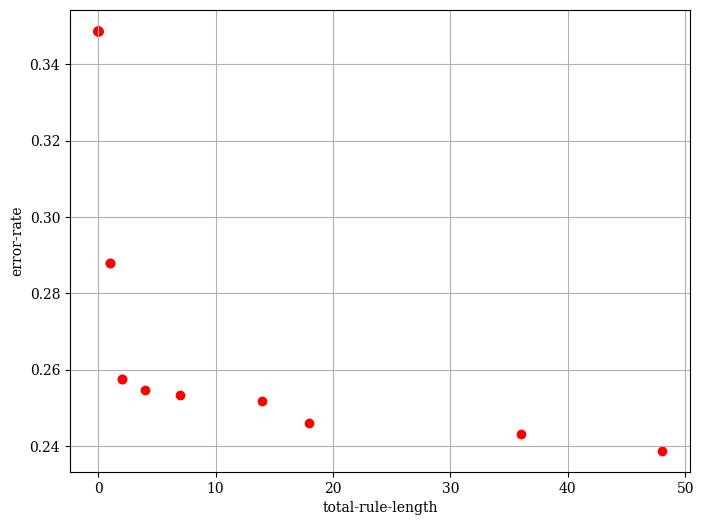

In [6]:
plot = runner.get_pareto_front_plot(results.opt)
plot.show()
# plot.ax.set_ylim([0,1])
plot.ax.grid(visible=True)

In [8]:
results.opt.get('X')[1,0]

(Pittsburgh Solution) Variables: [(MichiganSolution) Variables: [0 0 0 0 0 0 0 0 ], Rule weight: 0.3025, Class label:  0], Objectives: [0.0 0.0 ], Attributes: {Number of classifier patterns: 50, Number of wins: 77, } ] Objectives 0.0 0.34876989869753977 ] Attributes: {'id': 10021, 'total_coverage': 1.0, 'total_rule_length': 0, 'average_rule_weight': 0.30246020260492035, 'training_error_rate': 0.34876989869753977, 'test_error_rate': 0.35064935064935066, 'num_rules': 1}

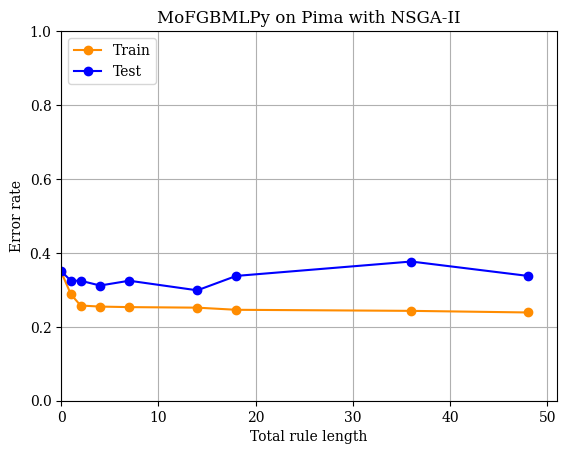

In [9]:
runner.plot_line_interpretability_error_rate_tradeoff(results.opt.get('X')[:, 0], title="MoFGBMLPy on Pima with NSGA-II", xlim=[0,51])


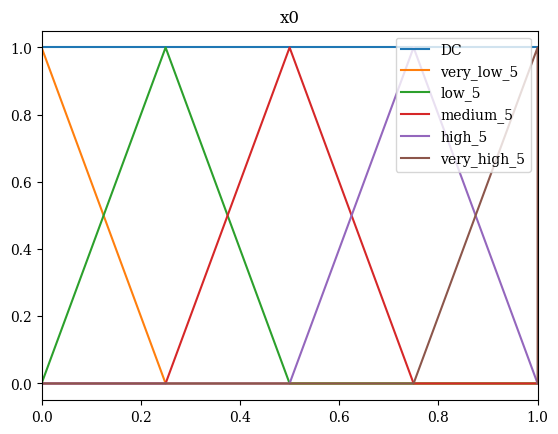

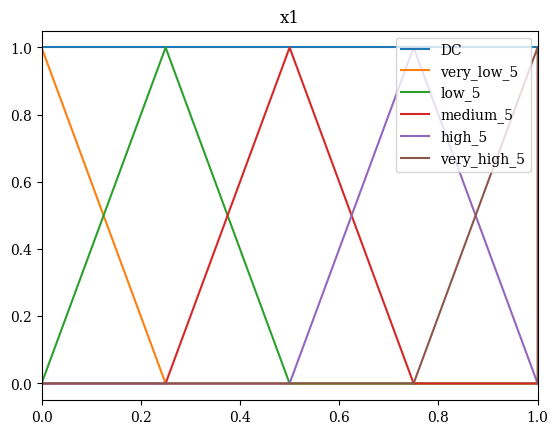

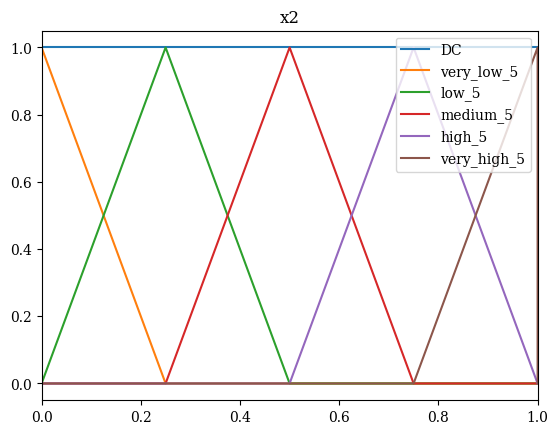

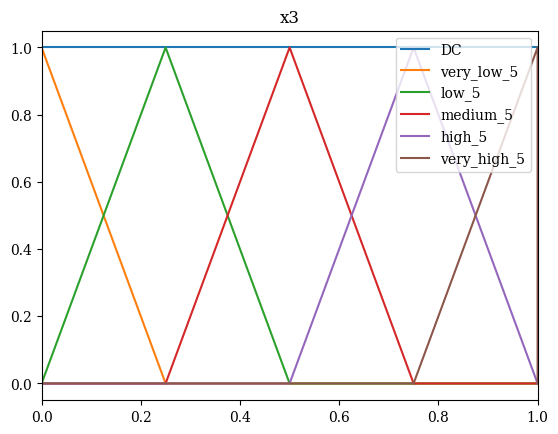

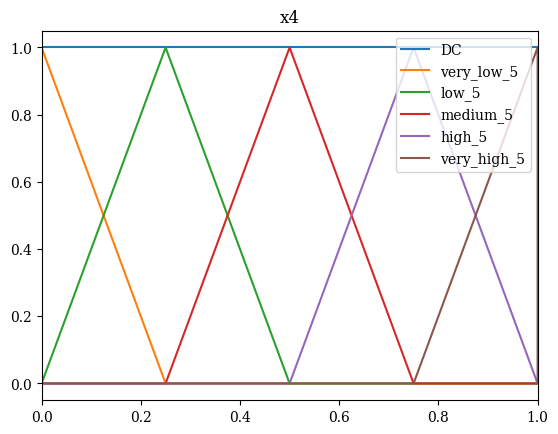

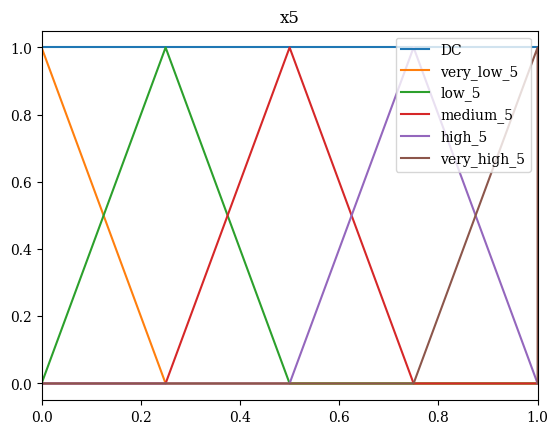

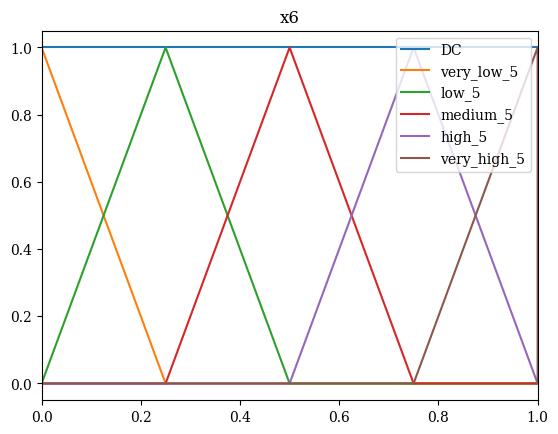

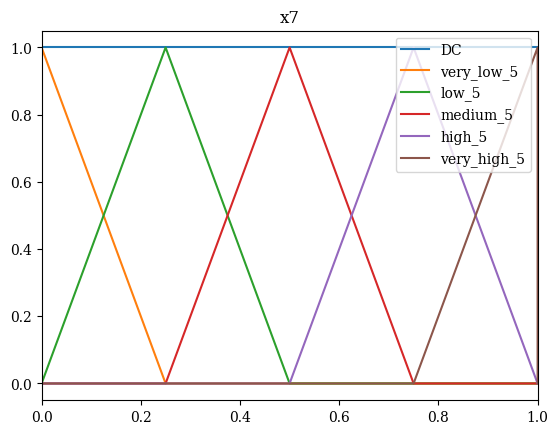

In [10]:
# runner.plot_line_interpretability_error_rate_tradeoff(results.opt.get('X')[:, 0], title="MoFGBMLPy on Iris with NSGA-II", xlim=[0,16])
# runner.plot_line_interpretability_error_rate_tradeoff(results.opt.get('X')[:, 0], title="MoFGBMLPy on Iris with MOEA/D", xlim=[0,10])
runner.plot_fuzzy_variables()

In [11]:
runner.save_video(results.history, "nsgaii_iris.mp4")

If the video doesn't play you can just get it in examples/ga.mp4

In [21]:
from IPython.display import Video
Video('./nsgaii_iris.mp4')

The time required to run the algorithm


In [13]:
results.exec_time

54.19785976409912

The final Population (Pymoo individual objects)

In [14]:
results.pop

Population([<pymoo.core.individual.Individual object at 0x0000023F06B03410>,
           dtype=object)

The best population design space values (here there is one variable which is a Pittsburgh solution)

In [15]:
results.X

array([[(Pittsburgh Solution) Variables: [(MichiganSolution) Variables: [0 4 1 0 1 0 0 2 ], Rule weight: 0.6895, Class label:  1], Objectives: [0.0 0.0 ], Attributes: {Number of classifier patterns: 0, Number of wins: 1, } (MichiganSolution) Variables: [0 1 0 2 0 3 1 0 ], Rule weight: 0.6232, Class label:  0], Objectives: [0.0 0.0 ], Attributes: {Number of classifier patterns: 0, Number of wins: 0, } (MichiganSolution) Variables: [0 0 3 0 1 0 4 3 ], Rule weight: 0.7940, Class label:  0], Objectives: [0.0 0.0 ], Attributes: {Number of classifier patterns: 0, Number of wins: 0, } (MichiganSolution) Variables: [5 0 4 0 0 4 1 0 ], Rule weight: 0.8675, Class label:  1], Objectives: [0.0 0.0 ], Attributes: {Number of classifier patterns: 0, Number of wins: 0, } (MichiganSolution) Variables: [0 3 0 0 0 0 2 0 ], Rule weight: 0.5680, Class label:  0], Objectives: [0.0 0.0 ], Attributes: {Number of classifier patterns: 44, Number of wins: 63, } (MichiganSolution) Variables: [1 2 3 2 0 0 3 1 ], R

The best population objective spaces values

In [16]:
results.F

array([[48.        ,  0.23878437],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [36.        ,  0.2431259 ],
       [ 1.        ,  0.28798842],
       [18.        ,  0.24602026],
       [ 2.        ,  0.25759768],
       [ 1.        ,  0.28798842],
       [14.        ,  0.25180897],
       [ 7.        ,  0.25325615],
       [ 4.        ,  0.25470333],
       [ 2.        ,  0.25759768],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,  0.3487699 ],
       [ 0.        ,

Algorithm object which has been iterated over (e.g. NSGA2 from Pymoo)

In [17]:
results.algorithm

Archive population (populations of each generation)

In [18]:
results.archive.get("X")
# results.archive.get("F")

array([[(Pittsburgh Solution) Variables: [(MichiganSolution) Variables: [0 0 0 0 1 0 0 0 ], Rule weight: 0.3751, Class label:  0], Objectives: [0.0 0.0 ], Attributes: {Number of classifier patterns: 13, Number of wins: 29, } (MichiganSolution) Variables: [0 0 0 0 0 2 0 0 ], Rule weight: 0.6617, Class label:  0], Objectives: [0.0 0.0 ], Attributes: {Number of classifier patterns: 5, Number of wins: 5, } (MichiganSolution) Variables: [0 0 0 0 0 0 0 0 ], Rule weight: 0.3025, Class label:  0], Objectives: [0.0 0.0 ], Attributes: {Number of classifier patterns: 1, Number of wins: 4, } (MichiganSolution) Variables: [2 0 0 0 0 0 0 0 ], Rule weight: 0.3451, Class label:  0], Objectives: [0.0 0.0 ], Attributes: {Number of classifier patterns: 0, Number of wins: 0, } (MichiganSolution) Variables: [0 0 0 0 0 0 0 1 ], Rule weight: 0.5460, Class label:  0], Objectives: [0.0 0.0 ], Attributes: {Number of classifier patterns: 24, Number of wins: 25, } (MichiganSolution) Variables: [0 0 0 2 0 0 0 0 ],

The best solutions as a Population object

In [19]:
results.opt

Population([<pymoo.core.individual.Individual object at 0x0000023F06B03410>,
           dtype=object)

Name of the objectives that are minimized

In [20]:
results.objectives_name

['Total rule length', 'Error rate']